In [31]:
% some housekeeping stuff
register_graphics_toolkit ("gnuplot");
available_graphics_toolkits ();
graphics_toolkit ("gnuplot")
clear
% end of housekeeping

# Titrate weak acid with NaOH

for weak acid (HA) you can write charge balance 

$[\mathrm{H}^+]+[\mathrm{Na}^+]=[\mathrm{OH}^-]+[\mathrm{Ac}^-]$

Using K$_w$ and K$_a$ (alpha expression) we can write this in terms of H+ and $Ac_T$

$[\mathrm{H}^+]+[\mathrm{Na}^+]=\dfrac{K_w}{[\mathrm{H}^+]}+\dfrac{Ac_TK_a}{[\mathrm{H}^+]+K_a}$

you can expand the polynomial and you get 

$a=1\\
b=Ka+Na\\
c=KaNaT-Kw-KaAT\\
d=-KwKa
$

note it is a cubic equation now (third order).  But root finding is easy enough with Octave.

In the code below we'll do this calculation and plot the titration curve. You can change the total volume, the titrant conc, the analyte conc and the pKa of the weak acid (titrate with NaOH).

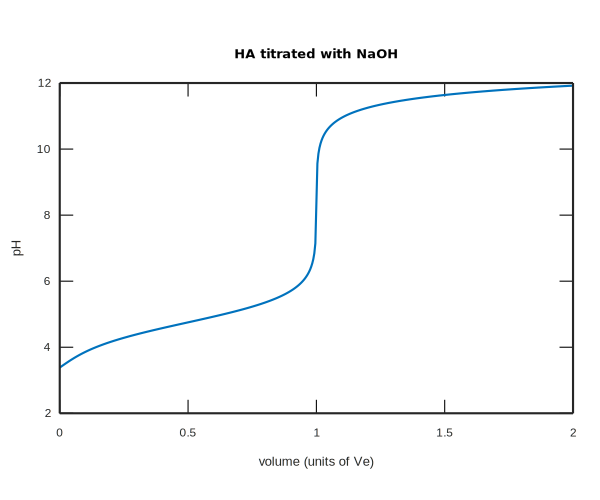

In [33]:
%plot -s 600,500 -f 'svg'
%input the parameters ...
AT=0.01; % conc of weak acid in mol/L
VT=0.1; % volume in L
pKa=4.75; % weak acid pKa value
titrantconc=0.1; % titrant conc in mol/L
%----------------------------------------------------
% fixed parameters
points=500; % number of points to plot between 0 and 2Ve
Kw=1e-14; Ka=10^-pKa; Ve=(AT*VT)/titrantconc; steps=(2*Ve)/points;
% now loop over titration points
vol=0:steps:2*Ve;
ATv=(AT*VT)./(vol+VT); NaT=(vol*titrantconc)./(vol+VT);

for i=1:length(vol)
    a=1;
    b=Ka+NaT(i);
    c=NaT(i)*Ka-Ka*ATv(i)-Kw;
    d=-Kw*Ka;
    t=roots([a b c d]); %finds the roots
    t=t(imag(t)==0); %sets any imaginary roots to zero
    % display the positive real root
    t=t(t>0); pH(i)=-log10(t);
end

vol=vol*1000;

plot(vol,pH,'linewidth',2); xlabel('volume (mL)'); ylabel('pH')
set(gca,'fontsize',11,'linewidth',2)
title('HA titrated with NaOH')
%axis([0 0.02 2 12])

% add strong strong for comparison
%pHs=2:0.1:12; Hs=10.^-pHs; OHs=Kw./Hs; Nas=OHs+AcT-Hs; 
%hold on; plot(Nas,pHs,'k--','linewidth',2)